100%|██████████| 9.91M/9.91M [00:00<00:00, 18.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 496kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.71MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 16.0MB/s]


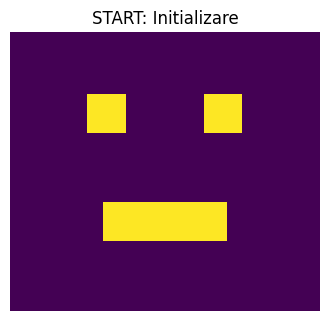

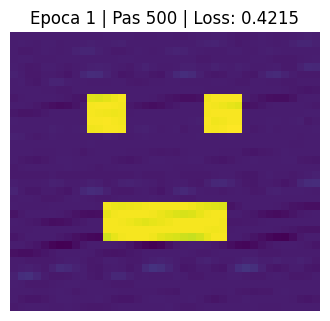

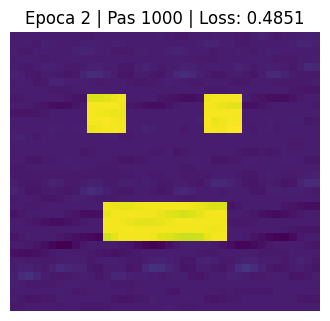

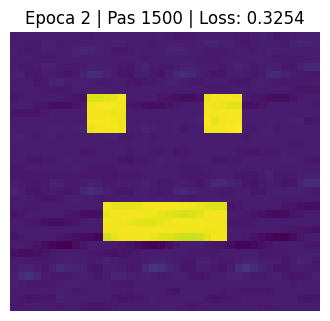

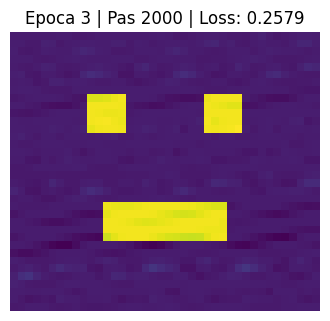

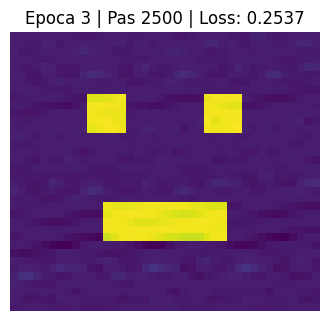

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import time

BATCH_SIZE = 64
LEARNING_RATE = 0.01
EPOCHS = 3
VISUALIZE_EVERY = 500


transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)

class CNN_Duck(nn.Module):
    def __init__(self):
        super(CNN_Duck, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.flatten_size = 1440
        self.fc1 = nn.Linear(self.flatten_size, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(-1, self.flatten_size)
        x = self.fc1(x)
        return x

model = CNN_Duck()

def create_exact_pattern(total_size):
    h, w = 36, 40
    img = np.zeros((h, w))
    img[8:13, 10:15] = 2.0
    img[8:13, 25:30] = 2.0
    img[22:27, 12:28] = 2.0
    return img.flatten(), h, w

with torch.no_grad():
    pattern_flat, h_vis, w_vis = create_exact_pattern(model.flatten_size)
    pattern_tensor = torch.tensor(pattern_flat, dtype=torch.float32)
    model.fc1.weight[0] = pattern_tensor

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)

step_counter = 0

plt.figure(figsize=(4, 4))
img_init = model.fc1.weight[0].detach().numpy().reshape(h_vis, w_vis)
plt.imshow(img_init, cmap='viridis')
plt.title("START: Initializare")
plt.axis('off')
plt.show()

for epoch in range(EPOCHS):
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        step_counter += 1

        if step_counter % VISUALIZE_EVERY == 0:
            current_weights = model.fc1.weight[0].detach().numpy()
            img_visual = current_weights.reshape(h_vis, w_vis)

            plt.figure(figsize=(4, 4))
            plt.imshow(img_visual, cmap='viridis')
            plt.title(f"Epoca {epoch+1} | Pas {step_counter} | Loss: {loss.item():.4f}")
            plt.axis('off')
            plt.show()